## HW4 Classification of Green Fluorescent Protein
### Darian Yang

You can start with basic models, and then try your best to optimize your predictions by using more sophisticated models, feature engineering, and fine-tuning the hyperparameters. The grade of this homework will be based on the score you get on Kaggle. 

There is no specific requirement for a written summary for this homework, but please leave some necessary notes/comments in your submission to help the grader understand your workflow.

In this work you will predict the brightness level binarized for classification between high brightness (class 1) and low brightness (class 0) for a set of mutants of Green Fluorescent Protein

Please explore descriptors/featurisations for amino acid sequences.
The performance will be measured using F1 score metric (sklearn.metrics.f1_score)

Overfitting is prevented by using a public and private leaderboard..

#### Overall:
* Get data from Kaggle
* Make features
* Build classification models using only Scikit Learn!
* Submit solution for autograding to Kaggle
* Submit IPYNB file to canvas

#### Dataset Description
This dataset provides quantitative measurements of the brightness level binarized for classification between high brightness (class 1) and low brightness (class 0) for a set of mutants of Green Fluorescent Protein

File descriptions
* X_train_kaggle.csv - the training set: amino acid sequences Id column
* y_train_kaggle.csv - the training set: brightness class for training with Id column
* X_test_kaggle.csv - the test set: amino acid sequences with Id column that you should predict
* y_sample_submission.csv - a sample submission file in the correct format

To work with amino acid sequence for building a ML model you have to perform a feature engineering.
* a good start -subfolder "descriptors" contains descriptors for amino acids and papers describing their construction

#### Submission Format
For every molecule in the dataset, submission files should contain two columns: Id and ACTIVE.

The file should contain a header and have the following format:

```
Id,Brightness_Class
1,1
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
X_train = pd.read_csv("X_train_kaggle.csv").to_numpy()
y_train = pd.read_csv("y_train_kaggle.csv").to_numpy()
X_test = pd.read_csv("X_test_kaggle.csv").to_numpy()

In [4]:
X_train

array([['SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFISTTGKLPVPWPTLVTTLSYGVQCFSRYPDHTKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKSEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK',
        11328],
       ['SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYAQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYNMADKQKNGIKVNFKIRHNTEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTPSALSKDPNEERDHMVLLEFVTAAGITHGMDELYK',
        5781],
       ['SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIRTTGKLPVPWPTLVTTLSYGVQCSSRYPDHMKQHDLFKSAMPEGYAQERTIFSKDDGNYETRAEVRFEGDALVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSEQLADHYQQNTPIGDGPVLLPDDHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK',
        13681],
       ...,
       ['SKGEELFTGVVPVLVELDGDVNGHKFSVSGEGEGDATYGKLTLKLICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVMFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNT

In [5]:
y_train

array([[    0, 11328],
       [    0,  5781],
       [    0, 13681],
       ...,
       [    0,  4140],
       [    1, 15193],
       [    1, 30255]])

First get rid of the 225 aa length sequences, only keeping lengths of 237.

In [6]:
to_filter = []
for seq in X_train[:,0]:
    if len(seq) < 237:
        to_filter.append(False)
    else:
        to_filter.append(True)

len(to_filter)

33029

In [7]:
X_train = X_train[to_filter]
y_train = y_train[to_filter]

Perhaps doing something like MSA and only looking at the non-conserved region to reduce dimensions could be helpful?

In [16]:
X_train[1,0]

'SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYAQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYNMADKQKNGIKVNFKIRHNTEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTPSALSKDPNEERDHMVLLEFVTAAGITHGMDELYK'

In [29]:
# I want to find the most commonly substituted GFP sequence positions
common = []
for seq in X_train[:,0]:
    common.append([i for i in range(len(X_train[1,0])) if X_train[0,0][i] != seq[i]])

In [33]:
common_flat = [item for sublist in common for item in sublist]

In [36]:
len(common_flat)

210768

In [45]:
hist, edges = np.histogram(common_flat, bins=237)
midpoints = (edges[:-1] + edges[1:]) / 2

In [46]:
hist

array([  751,   111,   599,   466,   485,   998,   580,   122,   462,
         427,    97,   621,   414,   354,   500,   389,   553,   102,
         473,   276,   900,   118,   596,   763,   664,   586,   464,
         470,    93,   498,    73,   543,    79,   618,    79,   604,
         560,   110,   745,   355,   520,   302,   753,   915,   883,
       30887,   534,   434,    93,   859,   326,   105,   407,    70,
         364,   108,   444,   362,   445,   691,   411,   415,   423,
         392,   118,   723,   370,   371,   864,   591,   216,   428,
         138,   514,   466, 30803,   930,   576,     0,   507,   355,
         679,   903,   533,   358,   140,   782,   145,   623,    78,
         406,   536,   314,   440,   161,   579,   702,  1048,   822,
         829,   515,   413,   105,   890,   421,   937,   470,   179,
         110,   425,   435,  1029, 30833,   435,    92,   596,   591,
           0,     0,  1079,   170,   778,   473,   291,   806,    86,
        1022,   521,

<BarContainer object of 237 artists>

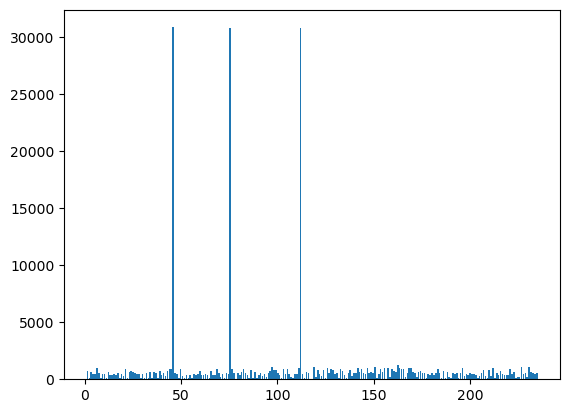

In [47]:
plt.bar(midpoints, hist)

In [48]:
for i, count in enumerate(hist):
    if count > 5000:
        print(f"{count} at {i + 1}")

30887 at 46
30803 at 76
30833 at 113


So resids 46, 76, and 113 seem to have the most mutations. Not sure if this is super important to focus on but maybe I'll come back to it if needed. Maybe I could just look at the features for these three residues only?

#### Okay, time to build in some features using the descriptors. 
Let's start with just one file, I'll go with physical.csv.

My goal here is to build a large 2d array where each row is a GFP sequence and the number of columns will be of size 237 (aa) by n features. At first I thought it would be good to keep the columns to 237 to match the residues and add features depth-wise, but now I think it's best to make a big 2d array.

In [77]:
!ls

descriptors    X_test_kaggle.csv   y_sample_submission.csv
hw4_dty.ipynb  X_train_kaggle.csv  y_train_kaggle.csv


In [78]:
def process_feature(feature_name):
    """
    Output a df with single aa code as index and cols as features.
    """
    features = pd.read_csv(f"descriptors/{feature_name}.csv", skiprows=2, index_col=1)
    return features.drop("AA_3", axis=1)
    
f = process_feature("Physical")
print(np.shape(f))
f.loc["A"].to_numpy()

(20, 2)


array([-2.9 , -1.03])

In [70]:
def feature_array_from_seqs(sequences, features):
    """
    Take a 1d GFP sequences array and features (df) and return features 
    for each amino acid in the input sequence.
    """
    n_features = np.shape(features)[1]
    # make final feature array: sequence = 237 and features are 20 aa by n features
    feature_array = np.zeros((len(sequences), len(sequences[0]) * n_features))

    # loop through sequences
    for i, seq in enumerate(sequences):
        # loop through each residue in the sequence
        for j, aa in enumerate(seq):
            # add the feature float values to array at appropriate indicies
            feature_array[i, j+j : j+j+n_features] = features.loc[aa].to_numpy()
    
    return feature_array

In [72]:
# test
fa = feature_array_from_seqs(X_train[:10,0], f)
fa[:10]

array([[-2.36,  0.38,  0.92, ..., -0.18,  0.92,  1.23],
       [-2.36,  0.38,  0.92, ..., -0.18,  0.92,  1.23],
       [-2.36,  0.38,  0.92, ..., -0.18,  0.92,  1.23],
       ...,
       [-2.36,  0.38,  0.92, ..., -0.18,  0.92,  1.23],
       [-2.36,  0.38,  0.92, ..., -0.18,  0.92,  1.23],
       [-2.36,  0.38,  0.92, ..., -0.18,  0.92,  1.23]])

In [73]:
fa.shape

(10, 474)

In [69]:
X_train[:,0]

array(['SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFISTTGKLPVPWPTLVTTLSYGVQCFSRYPDHTKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKSEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK',
       'SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYAQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYNMADKQKNGIKVNFKIRHNTEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTPSALSKDPNEERDHMVLLEFVTAAGITHGMDELYK',
       'SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIRTTGKLPVPWPTLVTTLSYGVQCSSRYPDHMKQHDLFKSAMPEGYAQERTIFSKDDGNYETRAEVRFEGDALVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSEQLADHYQQNTPIGDGPVLLPDDHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK',
       ...,
       'SKGEELFTGVVPVLVELDGDVNGHKFSVSGEGEGDATYGKLTLKLICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVMFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSEDPNEKRDRMVLLEFVTAAGITHGMDELY

Building the feature array works. Now to do this for every sequence.

In [80]:
feat_array = feature_array_from_seqs(X_train[:,0], process_feature("Physical"))

Okay, so now maybe I can build a model using this set of features for each sequence.